In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#### load dataset

In [2]:
file_path_train = 'D:/WEB/train.csv'
file_path_test = 'D:/WEB/test.csv'

data = pd.read_csv(file_path_train)
test = pd.read_csv(file_path_test)

Explore the top five rows and header values

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We note missing values in Age, Cabin and Embarked

In [6]:
test.shape

(418, 11)

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In test data there are missing values in Age, Fare and Cabin

<AxesSubplot:xlabel='Embarked', ylabel='count'>

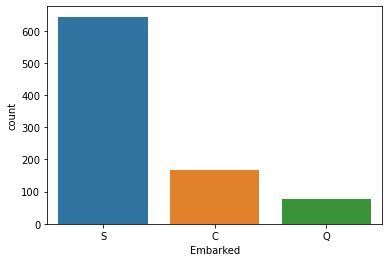

In [8]:
sns.countplot(x='Embarked',data=data)

### Fill missing values

In [9]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [10]:
data["Embarked"].fillna("S",inplace=True)

In [11]:
test["Age"].fillna(test["Age"].mean(),inplace=True)

In [12]:
test["Fare"].fillna(test["Fare"].mean(),inplace=True)

Drop Cabin column

In [13]:
data.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [14]:
test.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

### Dummy variable

In [15]:
data = pd.get_dummies(data)

In [16]:
data.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
886,887,0,2,27.000000,0,0,13.00,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.00,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.45,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.00,0,1,1,0,0
890,891,0,3,32.000000,0,0,7.75,0,1,0,1,0


In [17]:
del data['Sex_female']
del data['Embarked_C']

In [18]:
data.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
886,887,0,2,27.000000,0,0,13.00,1,0,1
887,888,1,1,19.000000,0,0,30.00,0,0,1
888,889,0,3,29.699118,1,2,23.45,0,0,1
889,890,1,1,26.000000,0,0,30.00,1,0,0
890,891,0,3,32.000000,0,0,7.75,1,1,0


In [19]:
test = pd.get_dummies(test)

In [20]:
del test['Sex_female']
del test['Embarked_C']

### X-y split

In [21]:
X_train_full = data.drop('Survived',axis=1)
y_train_full = data['Survived']

### train-test-split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test, y_train, y_test = train_test_split(X_train_full,y_train_full,test_size=0.3, random_state=23)

### Model training

In [24]:
from xgboost import XGBClassifier

In [25]:
model = XGBClassifier(n_estimators=1000,
                      max_depth=3,
                      learning_rate=0.1,
                      random_state=23,n_jobs=-1)

In [26]:
model.fit(X_train_full,y_train_full)

D:\APPLICATIONS\ANACONDA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              random_state=23, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [27]:
#from sklearn.metrics import accuracy_score

In [28]:
#accuracy_score(y_test,model.predict(X_test))

In [29]:
predictions = model.predict(test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('D:/WEB/my_submission.csv', index=False)
